In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [13]:
class ReturnBestEarlyStopping(EarlyStopping):
  def __init__(self, **kwargs):
    super(ReturnBestEarlyStopping, self).__init__(**kwargs)

  def on_train_end(self, logs=None):
    if self.stopped_epoch > 0:
      if self.verbose > 0:
        print(f'\nEpoch {self.stopped_epoch + 1}: early stopping')
    elif self.restore_best_weights:
      if self.verbose > 0:
        print('Restoring model weights from the end of the best epoch.')
      self.model.set_weights(self.best_weights)

In [17]:
def plot_metric(history, metric, init=0, title='Training and validation', path='/content', save=False, ext='pdf'):
  train_metrics = history[metric][init:]
  val_metrics = history['val_'+metric][init:]
  epochs = [i for i in range(init + 1, len(train_metrics) + 1 + init)]
  with plt.style.context('seaborn'):
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    if save:
      plt.savefig(f"{path}/{title}.{ext}")
  plt.show()

In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
NUM_CLASSES = 10
CIFAR10_CLASSES = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)
Y_train.shape, Y_test.shape

((50000, 10), (10000, 10))

In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',  activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2,strides=2,padding='valid'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [14]:
earlyStopping = ReturnBestEarlyStopping(monitor='val_accuracy', 
                                        patience=50, 
                                        verbose=1, 
                                        mode='max', 
                                        restore_best_weights=True)

In [15]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [16]:
history = model.fit(x=X_train, 
                    y=Y_train, 
                    batch_size=128,
                    epochs=50,  
                    verbose=1,
                    callbacks=[earlyStopping],
                    validation_data=(X_test, Y_test))

Epoch 1/50
391/391 [==============================] - 4s 11ms/step - loss: 1.5082 - accuracy: 0.4521 - val_loss: 1.1585 - val_accuracy: 0.5869
Epoch 2/50
391/391 [==============================] - 4s 10ms/step - loss: 1.1098 - accuracy: 0.6038 - val_loss: 1.0082 - val_accuracy: 0.6444
Epoch 3/50
391/391 [==============================] - 4s 10ms/step - loss: 0.9496 - accuracy: 0.6617 - val_loss: 0.8609 - val_accuracy: 0.6932
Epoch 4/50
391/391 [==============================] - 4s 10ms/step - loss: 0.8450 - accuracy: 0.7008 - val_loss: 0.8081 - val_accuracy: 0.7199
Epoch 5/50
391/391 [==============================] - 4s 10ms/step - loss: 0.7703 - accuracy: 0.7294 - val_loss: 0.7302 - val_accuracy: 0.7454
Epoch 6/50
391/391 [==============================] - 4s 10ms/step - loss: 0.7029 - accuracy: 0.7513 - val_loss: 0.7071 - val_accuracy: 0.7506
Epoch 7/50
391/391 [==============================] - 4s 10ms/step - loss: 0.6486 - accuracy: 0.7710 - val_loss: 0.6859 - val_accuracy: 0.7640

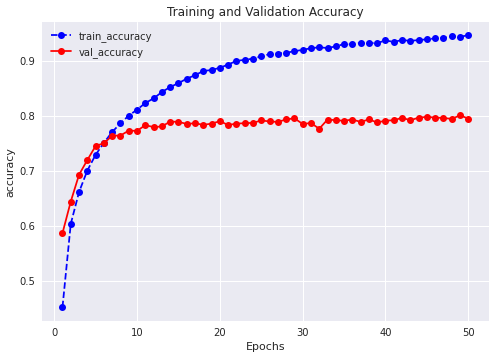

In [20]:
plot_metric(history.history,
            'accuracy', 
            title=f'Training and Validation Accuracy', 
            path='/content', 
            save=True, 
            ext='pdf')

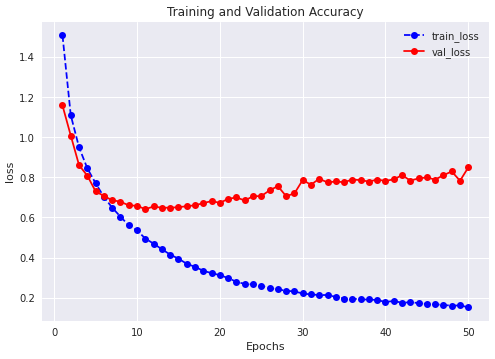

In [21]:
plot_metric(history.history,
            'loss', 
            title=f'Training and Validation Accuracy', 
            path='/content', 
            save=True, 
            ext='pdf')